# Dataset de Iris

## Imports

In [ ]:
import sys

sys.path.append("../libs")

import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import neuronas
from sklearn.metrics import confusion_matrix

importlib.reload(neuronas)

from neuronas import NeuronaPerceptron

## Cargar dataset

In [97]:
df = pd.read_csv("../data/Iris.csv")

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Descripción del dataset

El conjunto de datos Iris es uno de los más conocidos y utilizados en el campo del análisis estadístico y el aprendizaje automático. Fue introducido por el estadístico R.A. Fisher en 1936 en su trabajo sobre clasificación de especies mediante medidas múltiples, y actualmente forma parte del repositorio de datos de la Universidad de California en Irvine (UCI).

Este dataset contiene información sobre tres especies distintas de flores del género Iris, con 50 observaciones por especie. Para cada flor, se registraron medidas de largo y ancho tanto del sépalo como del pétalo.


### Descripción de las variables

- **Id**: Identificador de la observación
- **SepalLengthCm**: Longitud del sépalo en centímetros
- **SepalWidthCm**: Ancho del sépalo en centímetros
- **PetalLengthCm**: Longitud del pétalo en centímetros
- **PetalWidthCm**: Ancho del sépalo en centímetros
- **Species**: Tipo de especie

### Cantidad de muestras por especie

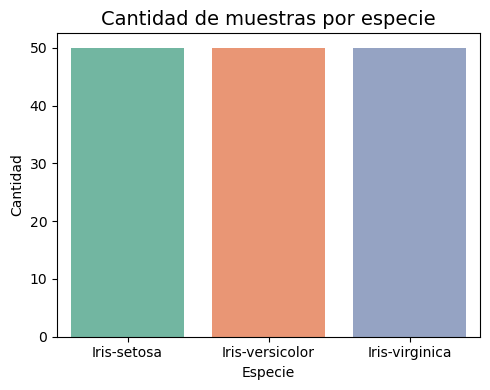

In [103]:
plt.figure(figsize=(5, 4))
sns.countplot(x="Species", data=df, palette="Set2", hue="Species", legend=False)
plt.title("Cantidad de muestras por especie", fontsize=14)
plt.xlabel("Especie")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

### Relación entre ancho y largo del Sépalo por Especie

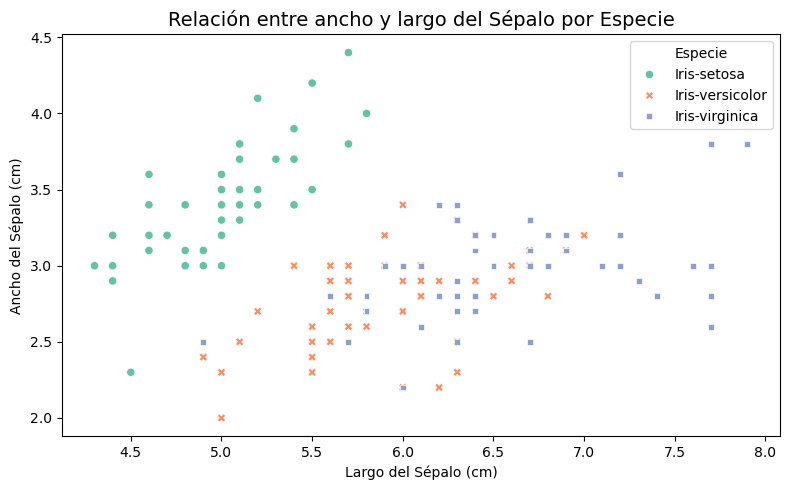

In [110]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="SepalLengthCm",
    y="SepalWidthCm",
    hue="Species",
    style="Species",
    sizes=(20, 200),
    palette="Set2",
    data=df
)
plt.title("Relación entre ancho y largo del Sépalo por Especie", fontsize=14)
plt.xlabel("Largo del Sépalo (cm)")
plt.ylabel("Ancho del Sépalo (cm)")
plt.legend(title="Especie")
plt.tight_layout()
plt.show()

### Relación entre ancho y largo del Pétalo por Especie

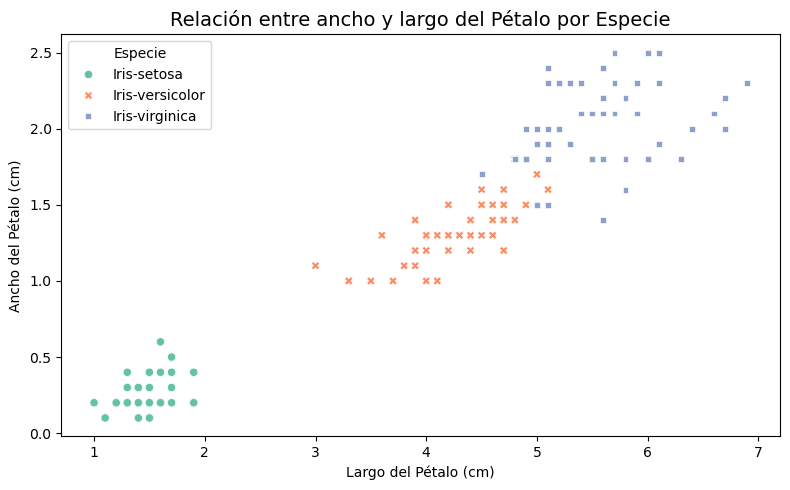

In [112]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    style="Species",
    sizes=(20, 200),
    palette="Set2",
    data=df
)
plt.title("Relación entre ancho y largo del Pétalo por Especie", fontsize=14)
plt.xlabel("Largo del Pétalo (cm)")
plt.ylabel("Ancho del Pétalo (cm)")
plt.legend(title="Especie")
plt.tight_layout()
plt.show()

## Transformación del dataset

### Filtrar especies a utilizar en la predicción

In [ ]:
# Descartar la especie virginica
df = df[df["Species"] != "Iris-virginica"].copy()

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


### Estandarización de variables

In [43]:
# Longitud del sépalo
df["SepalLength"] = (df["SepalLengthCm"] - df["SepalLengthCm"].min()) / (
    df["SepalLengthCm"].max() - df["SepalLengthCm"].min()
)

# Ancho del sépalo
df["SepalWidth"] = (df["SepalWidthCm"] - df["SepalWidthCm"].min()) / (
    df["SepalWidthCm"].max() - df["SepalWidthCm"].min()
)

# Longitud del pétalo
df["PetalLength"] = (df["PetalLengthCm"] - df["PetalLengthCm"].min()) / (
    df["PetalLengthCm"].max() - df["PetalLengthCm"].min()
)

# Ancho del pétalo
df["PetalWidth"] = (df["PetalWidthCm"] - df["PetalWidthCm"].min()) / (
    df["PetalWidthCm"].max() - df["PetalWidthCm"].min()
)

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLength,SepalWidth,PetalLength,PetalWidth
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.296296,0.625000,0.097561,0.058824
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.222222,0.416667,0.097561,0.058824
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.148148,0.500000,0.073171,0.058824
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.111111,0.458333,0.121951,0.058824
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.259259,0.666667,0.097561,0.058824
...,...,...,...,...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,0.518519,0.416667,0.780488,0.647059
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,0.518519,0.375000,0.780488,0.705882
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,0.703704,0.375000,0.804878,0.705882
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,0.296296,0.208333,0.487805,0.588235


### Codificación de la variable objetivo

In [44]:
df["Specie_"] = df["Species"].map({"Iris-setosa": 0, "Iris-versicolor": 1})

df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,SepalLength,SepalWidth,PetalLength,PetalWidth,Specie_
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0.296296,0.625000,0.097561,0.058824,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0.222222,0.416667,0.097561,0.058824,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0.148148,0.500000,0.073171,0.058824,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0.111111,0.458333,0.121951,0.058824,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0.259259,0.666667,0.097561,0.058824,0
...,...,...,...,...,...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,0.518519,0.416667,0.780488,0.647059,1
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,0.518519,0.375000,0.780488,0.705882,1
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,0.703704,0.375000,0.804878,0.705882,1
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,0.296296,0.208333,0.487805,0.588235,1


## Dividir entrenamiento y prueba

In [62]:
# Seleccionar variables
x = df.loc[:, ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]].to_numpy()
y = df.loc[:, ["Specie_"]].to_numpy().flatten()

# Seleccionar aleatoriamente los indices
indices_reordenados = np.random.permutation(len(x))

x = x[indices_reordenados]
y = y[indices_reordenados]

# Seleccinar aleatoriamente el 80% de entrenamiento
index_for_train = np.random.choice(x.shape[0], int(x.shape[0] * 0.8), replace=False)

x_train = x[index_for_train]
y_train = y[index_for_train]

# Obtener el 20% de test
group_all_indexes_100p = set(range(x.shape[0]))
group_selected_indexes_80p = set(index_for_train)
group_not_selected_indexes_20p = group_all_indexes_100p - group_selected_indexes_80p
group_not_selected_indexes_20p = list(group_not_selected_indexes_20p)

x_test = x[group_not_selected_indexes_20p]
y_test = y[group_not_selected_indexes_20p]


## Entrenamiento

In [77]:
labels = ["setosa", "versicolor"]

### Entrenamiento con 1 época

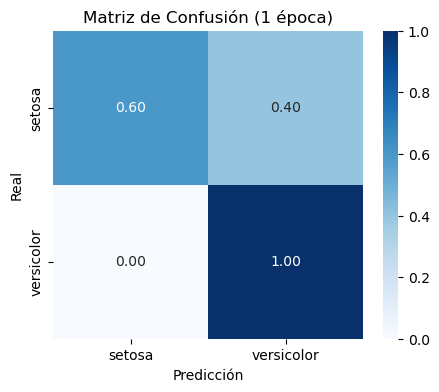

In [ ]:
# Entrenar
perceptron_1 = NeuronaPerceptron(entradas=4, salidas=1)
perceptron_1.entrenar_ajustar(x_train, y_train, 0.025, 1)
salidas_1 = perceptron_1.predecir_feedforward(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, salidas_1, normalize="true")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.title("Matriz de Confusión (1 época)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Entrenamiento con 2 épocas

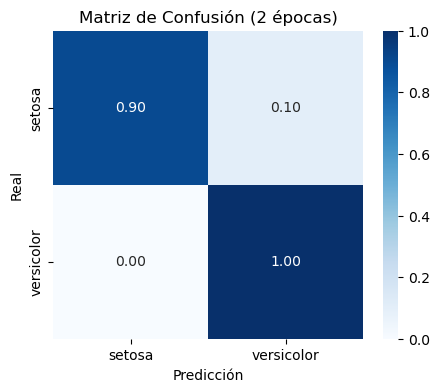

In [95]:
# Entrenar
perceptron_2 = NeuronaPerceptron(entradas=4, salidas=1)
perceptron_2.entrenar_ajustar(x_train, y_train, 0.025, 2)
salidas_2 = perceptron_2.predecir_feedforward(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, salidas_2, normalize="true")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.title("Matriz de Confusión (2 épocas)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### Entrenamiento con 3 épocas

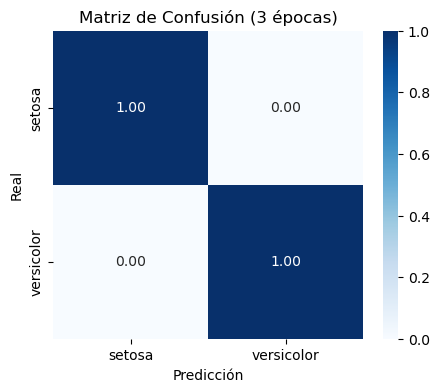

In [94]:
# Entrenar
perceptron_3 = NeuronaPerceptron(entradas=4, salidas=1)
perceptron_3.entrenar_ajustar(x_train, y_train, 0.025, 3)
salidas_3 = perceptron_3.predecir_feedforward(x_test)

# Matriz de confusión
cm = confusion_matrix(y_test, salidas_3, normalize="true")

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels,
)
plt.title("Matriz de Confusión (3 épocas)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()